In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment

import numpy as np
import pandas as pd
import tdt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from sp_extension import *

In [2]:
experiment_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all"
csv_base_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all_csvs"
# brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

In [3]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all/nn2-250117-085631/Notes.txt
read from t=0s to t=814.05s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all/nn4-250118-094351/Notes.txt
read from t=0s to t=795.95s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all/nn1-250117-081652/Notes.txt
read from t=0s to t=870.75s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all/pp7-250118-075659/Notes.txt
read from t=0s to t=800.05s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all/pp3-250118-064713/Notes.txt
read from t=0s to t=794.35s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Social_Pref/all/nn8-250118-105443/Notes.txt
read from t=0s to t=795.34s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine

In [9]:
bout_definitions = [
    {'prefix': 'Subject', 'introduced': 'Subject Introduced', 'removed': 'Subject Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions)
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first = True)

Processing behaviors for nn2-250117-085631...
Processing behaviors for nn4-250118-094351...
Processing behaviors for nn1-250117-081652...
Processing behaviors for pp7-250118-075659...
Processing behaviors for pp3-250118-064713...
Processing behaviors for nn8-250118-105443...
Processing behaviors for pp5-250117-121543...
Processing behaviors for pp4-250118-072201...
Processing behaviors for nn7-250118-101917...
Processing behaviors for pp8-250118-083250...
Processing behaviors for nn6-250117-101903...
Processing behaviors for pp6-250117-124823...
Processing behaviors for nn3-250118-090940...
Processing behaviors for nn5-250117-093631...
Processing behaviors for pp1-250117-110456...
Processing behaviors for pp2-250117-113909...
Processing behaviors for nn2-250117-085631...
Processing behaviors for nn4-250118-094351...
Processing behaviors for nn1-250117-081652...
Processing behaviors for pp7-250118-075659...
Processing behaviors for pp3-250118-064713...
Processing behaviors for nn8-25011

## Total Investigation Time & Average Bout Duration

In [10]:
# cohort 3 nac
nn1 = experiment.trials['nn1-250117-081652']
nn2 = experiment.trials['nn2-250117-085631']
nn3 = experiment.trials['nn3-250118-090940']
nn4 = experiment.trials['nn4-250118-094351']
nn5 = experiment.trials['nn5-250117-093631']
nn6 = experiment.trials['nn6-250117-101903']
nn7 = experiment.trials['nn7-250118-101917']
nn8 = experiment.trials['nn8-250118-105443']

# cohort 3 mpfc
pp1 = experiment.trials['pp1-250117-110456']
pp2 = experiment.trials['pp2-250117-113909']
pp3 = experiment.trials['pp3-250118-064713']
pp4 = experiment.trials['pp4-250118-072201']
pp5 = experiment.trials['pp5-250117-121543']
pp6 = experiment.trials['pp6-250117-124823']
pp7 = experiment.trials['pp7-250118-075659']
pp8 = experiment.trials['pp8-250118-083250']

df1 = nn1.behaviors
df2 = nn2.behaviors
df3 = nn3.behaviors
df4 = nn4.behaviors
df5 = nn5.behaviors
df6 = nn6.behaviors
df7 = nn7.behaviors
df8 = nn8.behaviors
df9 = pp1.behaviors
df10 = pp2.behaviors
df11 = pp3.behaviors
df12 = pp4.behaviors
df13 = pp5.behaviors
df14 = pp6.behaviors
df15 = pp7.behaviors
df16 = pp8.behaviors

In [6]:
def create_subject_summary_df(dfs):
    """
    Takes in a list of DataFrames (each CSV is one subject),
    and assigns a unique Subject ID (1 to N) to each DataFrame.
    
    For each subject:
      - Total Investigation Time = sum of "Duration (s)"
      - Average Bout Duration = total_investigation_time / number_of_bouts
    
    Returns a single DataFrame with columns:
      ['Bout', 'Subject', 'Behavior', 'Duration (s)',
       'Total Investigation Time', 'Average Bout Duration']
    """
    processed_list = []
    subject_id = 1
    
    for df in dfs:
        temp_df = df.copy()
        
        # Assign this entire CSV to one Subject
        temp_df["Subject"] = subject_id
        
        # Calculate sums and average for this subject
        total_invest_time = temp_df["Duration (s)"].sum()
        num_bouts = temp_df["Bout"].nunique()  # how many unique bouts in this CSV
        avg_bout_dur = total_invest_time / num_bouts if num_bouts else 0
        
        # Attach these values to every row
        temp_df["Total Investigation Time"] = total_invest_time
        temp_df["Average Bout Duration"] = avg_bout_dur
        
        processed_list.append(temp_df)
        subject_id += 1  # next CSV -> next Subject
    
    # Concatenate all into a single DataFrame
    final_df = pd.concat(processed_list, ignore_index=True)
    return final_df


In [11]:
#  Create a list of the DataFrames
trials = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16]

# Create one combined summary DataFrame (7 subjects total)
summary_df = create_subject_summary_df(trials)

# --- Behavior Processing for Each Subject ---
for nn in [nn1, nn2, nn3, nn4, nn5, nn6, nn7, nn8, pp1, pp2, pp3, pp4, pp5, pp6, pp7, pp8]:
    # Merge consecutive Investigation events that occur within 1 second.
    nn.combine_consecutive_behaviors(behavior_name='Investigation', bout_time_threshold=1)
    # Remove Investigation events shorter than 0.5 seconds (or adjust as needed).
    nn.remove_short_behaviors(behavior_name='Investigation', min_duration=0.5)

KeyError: 'Duration (s)'

In [ ]:
# --- Filter Summary DataFrame by Specific Behaviors ---
desired_behaviors = ["sniff cup 1", "sniff cup 2", "sniff cup 3", "sniff cup 4"]
filtered_summary_df = summary_df[summary_df["Behavior"].isin(desired_behaviors)]

# Remove Subject 5
filtered_df = filtered_summary_df[filtered_summary_df['Subject'] != 5]

# Group by Subject and Behavior, summing the Total Investigation Time
grouped_df = filtered_df.groupby(["Subject", "Behavior"], as_index=False)["Duration (s)"].sum()

# Pivot the grouped DataFrame so that rows are subjects and columns are behaviors
pivot_df = grouped_df.pivot(index="Subject", columns="Behavior", values="Duration (s)")
pivot_df = pivot_df.fillna(0)  # Fill missing values with 0

# Define the desired order of the bars
desired_order = ["sniff cup 1", "sniff cup 2", "sniff cup 3", "sniff cup 4"]

# Map original bout names to new labels
bout_rename_mapping = {
    "sniff cup 1": "Acq-ST",
    "sniff cup 2": "Short Term",
    "sniff cup 3": "Long Term",
    "sniff cup 4": "Novel"
}

# Rename columns in pivot_df
pivot_df = pivot_df.rename(columns=bout_rename_mapping)

# Reorder columns based on desired order
pivot_df = pivot_df[list(bout_rename_mapping.values())]  # Ensure the bars are plotted in the correct order

KeyError: 'Behavior'

In [ ]:
def plot_y_across_bouts_gray(df,  
                             title='Mean Across Bouts', 
                             ylabel='Mean Value', 
                             custom_xtick_labels=None, 
                             custom_xtick_colors=None, 
                             ylim=None, 
                             bar_color='#00B7D7',
                             yticks_increment=None, 
                             xlabel='Agent',
                             figsize=(12,7), 
                             pad_inches=0.1):
    """
    Plots the mean values during investigations or other events across bouts with error bars for SEM,
    and individual subject lines connecting the bouts. All subjects are plotted in gray.

    Performs t-tests and plots significance markers above bars.
    """

    def perform_t_tests(df):
        """Performs paired t-tests comparing Acq-ST with Short Term, Long Term, and Novel using pivot_df."""
        comparisons = {
            "acq_st_vs_short_term": ("Acq-ST", "Short Term"),
            "acq_st_vs_long_term": ("Acq-ST", "Long Term"),
            "acq_st_vs_novel": ("Acq-ST", "Novel")
        }

        results = {}

        for key, (bout1, bout2) in comparisons.items():
            if bout1 in df.columns and bout2 in df.columns:
                # Drop NaN values and ensure equal-length pairs
                paired_df = df[[bout1, bout2]].dropna()
                
                if len(paired_df) > 1:  # Ensure enough data points for paired t-test
                    t_stat, p_value = ttest_rel(paired_df[bout1], paired_df[bout2])
                    results[key] = {"t_stat": t_stat, "p_value": p_value}
        
        return results

    # Compute t-test results using the nested function
    t_test_results = perform_t_tests(df)

    # Calculate the mean and SEM for each bout
    mean_values = df.mean()
    sem_values = df.sem()

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the bar plot with error bars (mean and SEM)
    bars = ax.bar(
        df.columns, 
        mean_values, 
        yerr=sem_values, 
        capsize=6,
        color=bar_color,    
        edgecolor='black', 
        linewidth=5,
        width=0.6,
        error_kw=dict(elinewidth=3, capthick=3, zorder=5)
    )

    # Plot all subject lines in gray with connecting markers
    for i, subject in enumerate(df.index):
        ax.plot(df.columns, df.loc[subject], linestyle='-', color='gray', alpha=0.5, linewidth=2.5, zorder=1)
        ax.scatter(df.columns, df.loc[subject], facecolors='none', edgecolors='gray', s=120, alpha=0.6, linewidth=4, zorder=2)

    # Add labels, title, and format the axes
    ax.set_ylabel(ylabel, fontsize=30, labelpad=12)
    ax.set_xlabel(xlabel, fontsize=30, labelpad=12)
    ax.set_title(title, fontsize=16)

    # Set x-ticks
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(custom_xtick_labels if custom_xtick_labels else df.columns, fontsize=28)

    if custom_xtick_colors:
        for tick, color in zip(ax.get_xticklabels(), custom_xtick_colors):
            tick.set_color(color)

    ax.tick_params(axis='y', labelsize=30)
    ax.tick_params(axis='x', labelsize=30)

    # Automatically set y-limits
    if ylim is None:
        ax.set_ylim(0, max(mean_values) * 1.2)
    else:
        ax.set_ylim(ylim)

    # Set y-ticks increment
    if yticks_increment:
        y_min, y_max = ax.get_ylim()
        ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max) + yticks_increment, yticks_increment))

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)

    # ---- Plot significance markers ---- #
    if t_test_results:
        max_y = ax.get_ylim()[1]
        sig_y_offset = max_y * 0.05  # Offset above bars

        comparisons = {
            "acq_st_vs_short_term": (0, 1),
            "acq_st_vs_long_term": (0, 2),
            "acq_st_vs_novel": (0, 3)
        }

        line_spacing = sig_y_offset * 2.5  # Adjust to separate significance lines
        current_y = mean_values.max() + sig_y_offset  # Initial line position

        for key, (x1, x2) in comparisons.items():
            if key in t_test_results:
                p_value = t_test_results[key]["p_value"]
                if p_value < 0.05:
                    significance = "**" if p_value < 0.01 else "*" 

                    # Draw horizontal line
                    ax.plot([x1, x2], [current_y, current_y], color='black', linewidth=5)

                    # Add asterisks centered above the line
                    ax.text((x1 + x2) / 2, current_y + sig_y_offset / 1.5, significance, 
                            fontsize=40, ha='center', color='black')

                    # Move the next line slightly higher to avoid overlap
                    current_y += line_spacing

    plt.tight_layout()
    plt.show()

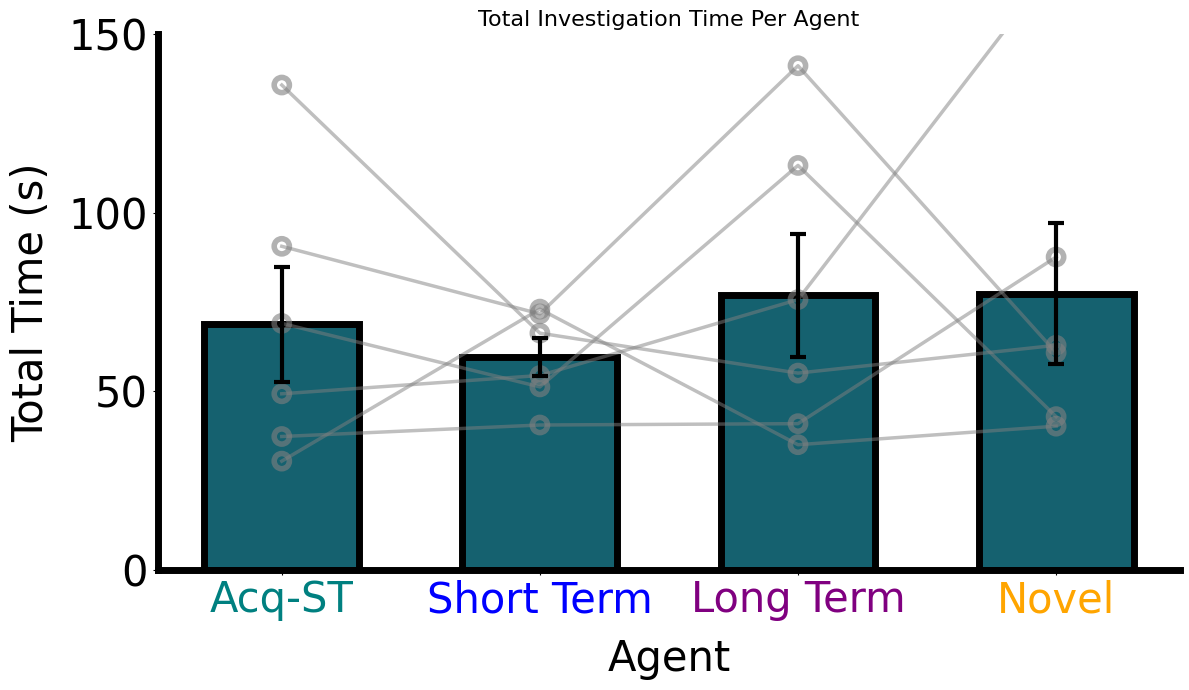

In [ ]:
plot_y_across_bouts_gray(
    df=pivot_df,
    title="Total Investigation Time Per Agent",
    ylabel="Total Time (s)",
    custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["teal", "blue", "purple", "orange"],
    ylim=(0, 150),
    bar_color=brain_region,
    yticks_increment=50,
    xlabel="Agent",
    figsize=(12,7),
    pad_inches=0.1
)